<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%204/MIS710_Lab_4_Logistic_Reg-Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lab 4 - Introduction to Logistic Regression**

**Authors: Associate Professor Lemai Nguyen and Thuc Nguyen**

Objective: To learn ML classification using logistic regression and gain practical skills to develop classification models and evaluate their performance


# **Task 1: Breast Cancer Diagnosis**

**Breast Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable.

**Data**:
V1, V2, V7-V9: biological variables

Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; also available at: https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients

**Important Libraries and Functions**

Read about Logistic Regression at:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Classification metrics:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

## **1.1 Import Libraries**

In [21]:
# Import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

## **1.2 Load and Inspect Data**


1.   Load the dataset
2.   Explore the data



In [22]:
url = "https://raw.githubusercontent.com/VanLan0/MIS710/main/biopsy_ln.csv"

In [23]:
# load dataset
records = pd.read_csv(url)

#explore the dataset
print(records)

          ID  V1  V2  V7  V8  V9 diagnosis
0    1177399   8   3   1   6   2   healthy
1    1246562  10   2   1   1   2   healthy
2    1108370   9   5   2   1   5   healthy
3    1165926   9   6   2   9  10   healthy
4    1167439   2   3   2   5   1   healthy
..       ...  ..  ..  ..  ..  ..       ...
694  1124651   1   3   7   2   1   healthy
695  1137156   2   2   7   1   1   healthy
696  1147044   3   1   7   1   1   healthy
697  1213375   8   4   7   8   2   healthy
698   721482   4   4   7   3   1   healthy

[699 rows x 7 columns]


In [ ]:
#What does the following code do?
print(records[50:70])

In [ ]:
#Write your own code to inspect the dataset shape, variables and data types. Hint use info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   V1         699 non-null    int64 
 2   V2         699 non-null    int64 
 3   V7         699 non-null    int64 
 4   V8         699 non-null    int64 
 5   V9         699 non-null    int64 
 6   diagnosis  699 non-null    object
dtypes: int64(6), object(1)
memory usage: 38.4+ KB


### **Inspect missing data**

In [ ]:
#Write your own code to inspect missing data. Hint: use isnull().sum()


ID           0
V1           0
V2           0
V7           0
V8           0
V9           0
diagnosis    0
dtype: int64

In [ ]:
#What does the code below do?
print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

records.describe()

In [ ]:
#What does the code below do?
records

In [ ]:
#What does the code below do? Why would you do it?

records = records.drop(['ID'], axis=1)
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   V1         699 non-null    int64 
 1   V2         699 non-null    int64 
 2   V7         699 non-null    int64 
 3   V8         699 non-null    int64 
 4   V9         699 non-null    int64 
 5   diagnosis  699 non-null    object
dtypes: int64(5), object(1)
memory usage: 32.9+ KB


### **Convert categorical data to numeric**
Define your own function and call it

In [ ]:
#convert categorical data to numerical
def coding_diagnosis(x):
    if x=='cancerous': return 1
    if x=='healthy': return 0

records['Diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

          ID  V1  V2  V7  V8  V9  diagnosis  Diagnosis
355  1057067   1   1   1   1   1    healthy          0
7    1295186  10  10   2   8   1    healthy          0
286  1253505   2   3   1   1   1    healthy          0
678  1371920   5   1   3   2   1    healthy          0
383   534555   1   1   1   1   1    healthy          0
671  1333063   5   1   3   1   1    healthy          0
39    785615   8   6   3   4   2  cancerous          1
227  1230994   4   5  10   7   1  cancerous          1
249  1183516   3   1   1   1   1    healthy          0
302  1238410   2   3   1   1   1    healthy          0


## **1.3 Conduct Exploratory Data Analysis EDA**
1. Univariate analysis
2. Bivariable analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.


3. Convert data as needed
You can also explore logistric regression relationships between two variables.


**Examine the distribution of the target**

<Axes: xlabel='diagnosis', ylabel='count'>

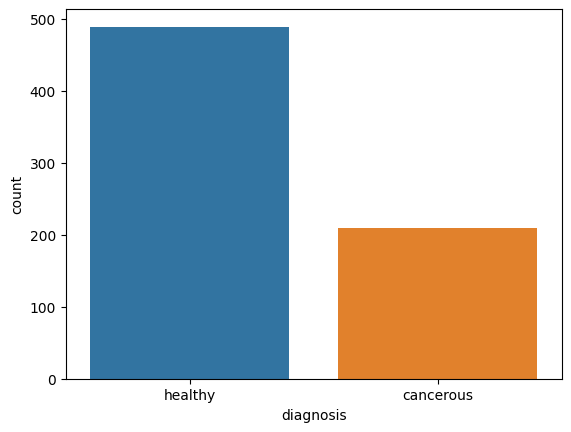

In [ ]:
#create barchats
sns.countplot(data=records, x='diagnosis')

In [ ]:
#Write your own code to summarise the diagnosis variable using value_counts()
#Interprete the result


healthy      489
cancerous    210
Name: diagnosis, dtype: int64

In [ ]:
#Write your own code to summarise the diagnosis variable in percentage. Hint: use value_counts(normalize=True)
#Interprete the result


healthy      0.6996
cancerous    0.3004
Name: diagnosis, dtype: float64

In [ ]:
#Interpreate the outcome of the following code
records['diagnosis'].describe()

count         699
unique          2
top       healthy
freq          489
Name: diagnosis, dtype: object

In [ ]:
#Interpreate the outcome of the following code
records.iloc[0:5].describe()

,V1,V2,V7,V8,V9
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,7.600000,3.800000,1.600000,4.400000,4.000000
std,3.209361,1.643168,0.547723,3.435113,3.674235
min,2.000000,2.000000,1.000000,1.000000,1.000000
25%,8.000000,3.000000,1.000000,1.000000,2.000000
50%,9.000000,3.000000,2.000000,5.000000,2.000000
75%,9.000000,5.000000,2.000000,6.000000,5.000000
max,10.000000,6.000000,2.000000,9.000000,10.000000


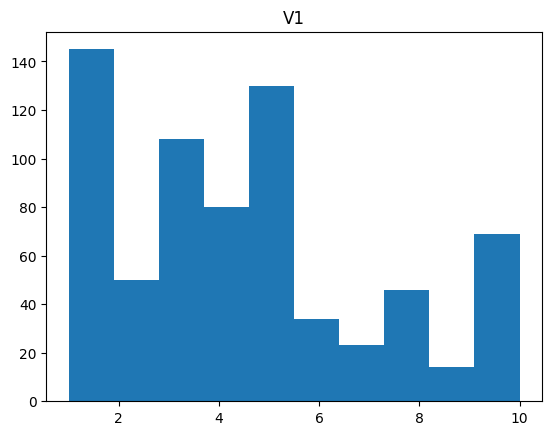

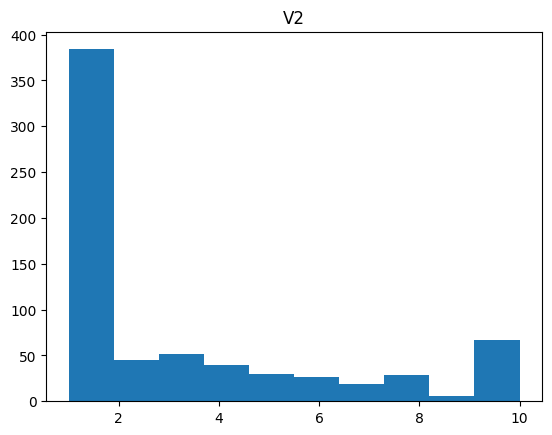

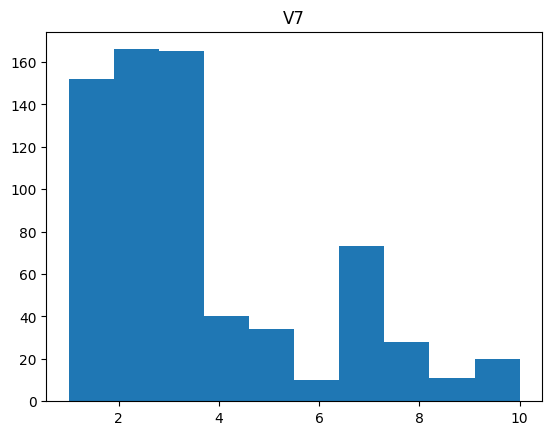

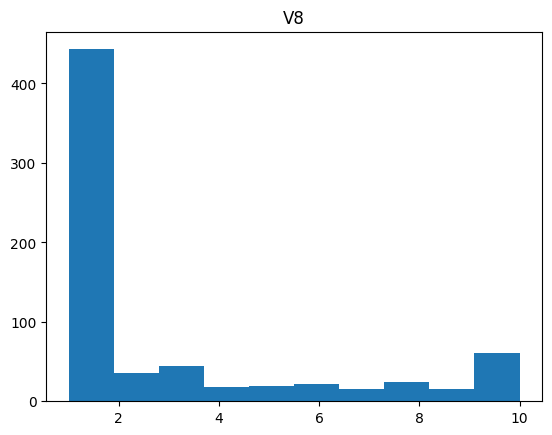

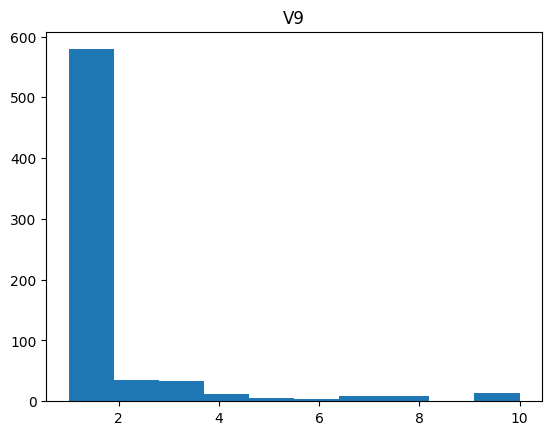

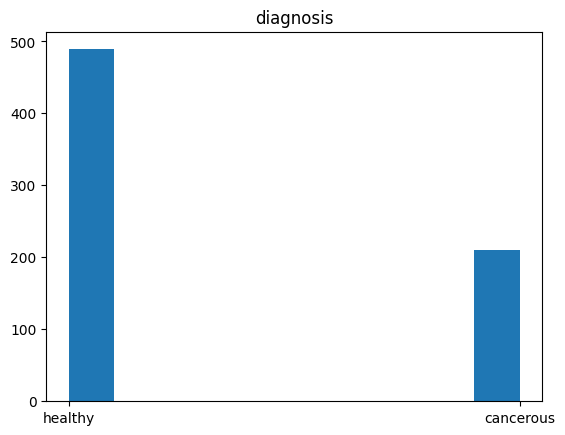

In [ ]:
#Write your code to create histograms for numeric variables.
#Hint use for loop for i in records.iloc[:,:]: and plt.hist(records[i])







**Examine other variables**
Run the code and write down your observations

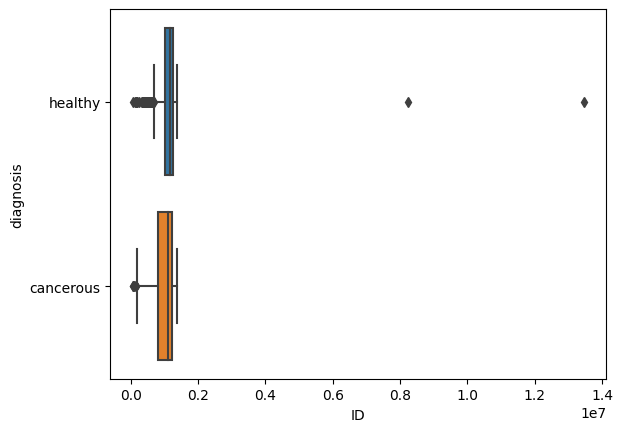

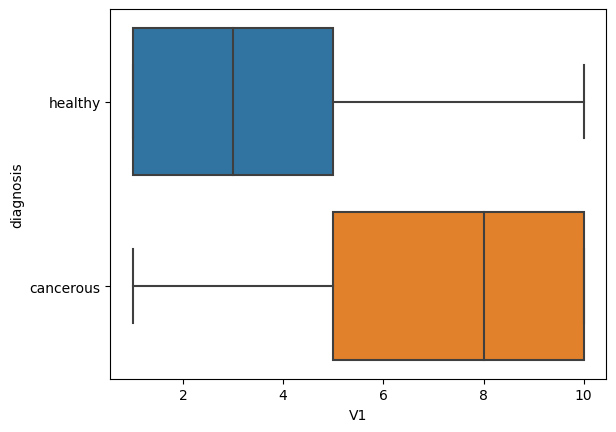

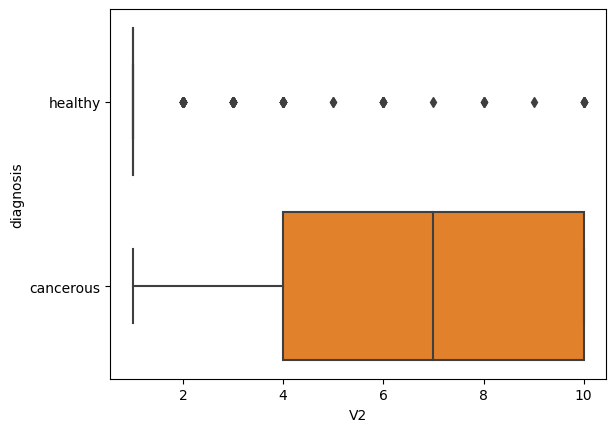

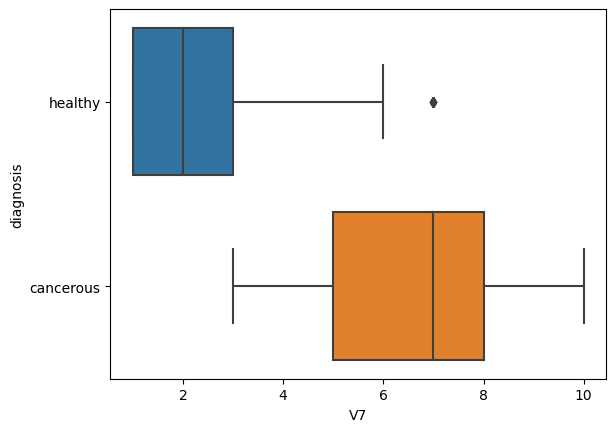

In [4]:
#Explain the code below and the outcome
for i in records.columns[0:4]:
    sns.boxplot(data=records, x=i, y='diagnosis')
    plt.show()

<ipython-input-36-0d47f9521318>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=records.corr(),  cmap='Blues', annot=True)


<Axes: >

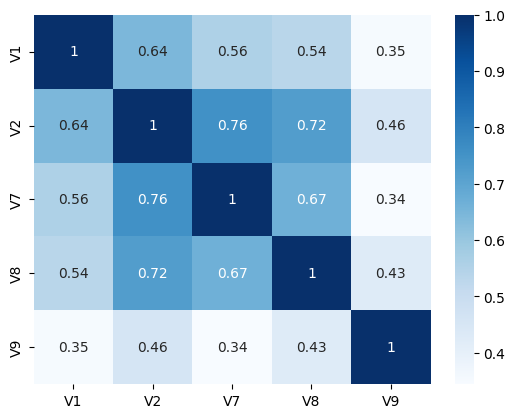

In [ ]:
#write your own heatmap using cmap='Blues' and annot=True. Hint: using data=records.corr()


What can you observe in the heatmap?

**Plotting biomarkers and diagnosis uaing a logistric relationship**

<Axes: xlabel='V7', ylabel='Diagnosis'>

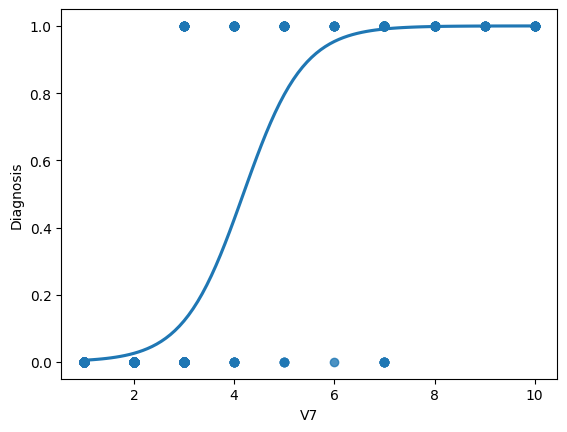

In [ ]:
sns.regplot(x=records['V7'], y=records['Diagnosis'], logistic=True, ci=None)

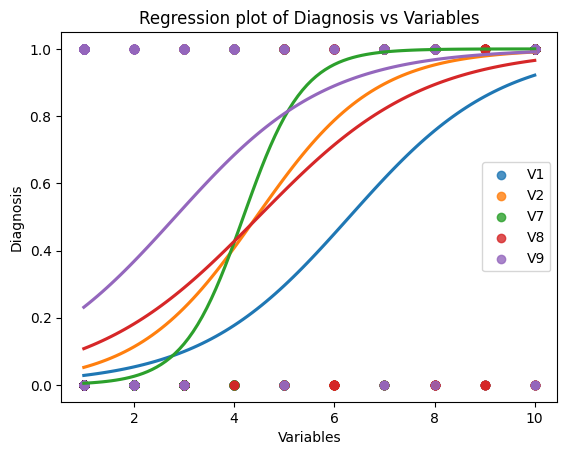

In [ ]:
#Do it yourself for other variables
# Hint: use for i in records.columns[0:5]: and the above line of code



plt.xlabel('Variables')  # Set x-axis label
plt.ylabel('Diagnosis')  # Set y-axis label
plt.title('Regression plot of Diagnosis vs Variables')  # Set title
plt.legend()  # Display legend
plt.show()  # Display the plot


## **1.4 Select Features and Target**

Select predictors (attributes) for Classification
Set role (Target)

In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   V1         699 non-null    int64 
 1   V2         699 non-null    int64 
 2   V7         699 non-null    int64 
 3   V8         699 non-null    int64 
 4   V9         699 non-null    int64 
 5   diagnosis  699 non-null    object
 6   Diagnosis  699 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 38.4+ KB


In [ ]:
#Selecting predictors
features = ['V1', 'V2', 'V7', 'V8', 'V9'] #you can select a range of columns features = records.columns[0:5]

#complete the code below
X = records[features]
y = records.Diagnosis


## **1.5 Split the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% testing



In [ ]:
#inspect the split datasets
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 617 to 37
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      559 non-null    int64
 1   V2      559 non-null    int64
 2   V7      559 non-null    int64
 3   V8      559 non-null    int64
 4   V9      559 non-null    int64
dtypes: int64(5)
memory usage: 26.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 584 to 305
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      140 non-null    int64
 1   V2      140 non-null    int64
 2   V7      140 non-null    int64
 3   V8      140 non-null    int64
 4   V9      140 non-null    int64
dtypes: int64(5)
memory usage: 6.6 KB
None


## **1.6 Train a Logistic Regression Model and Make Predictions**

1.   Train a model using the training dataset
2.   Make prediction using the model for the test dataset

Read about Logistic Regression Classifier at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html




In [ ]:
#Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)



In [ ]:
# Complete the code to train Logistic Regression Classifer with the traning dataset
logreg = logreg.fit(X_train, y_train)



In [ ]:
#Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)

**Inspect Predictions**

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

,V1,V2,V7,V8,V9,Actual,Predicted
584,1,1,3,1,1,0,0
417,4,1,2,1,1,0,0
606,1,1,3,1,1,0,0
349,5,1,1,1,1,0,0
134,1,5,7,10,1,1,1
502,3,1,2,1,1,0,0
117,8,4,7,3,1,1,1
528,3,1,2,1,1,0,0
685,3,2,4,2,1,0,0
411,1,1,2,1,1,0,0


## **1.7 Evaluate Model Performance**



1.   Calculate Accuracy, Precision, Recall, F1


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics







In [ ]:
#call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))



Accuracy:  0.9142857142857143
Precision:  0.8837209302325582
Recall:  0.8444444444444444
F1:  0.8636363636363636


Interpret the above

In [ ]:
#print confusion matrix and evaluation report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[90  5]
 [ 7 38]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.88      0.84      0.86        45

    accuracy                           0.91       140
   macro avg       0.91      0.90      0.90       140
weighted avg       0.91      0.91      0.91       140



**Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC curve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

In [ ]:
# First get the probabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test)

In [ ]:
#Now get the probabilities for the positive class (Cancer)
y_prob = probabilities[:, 1]

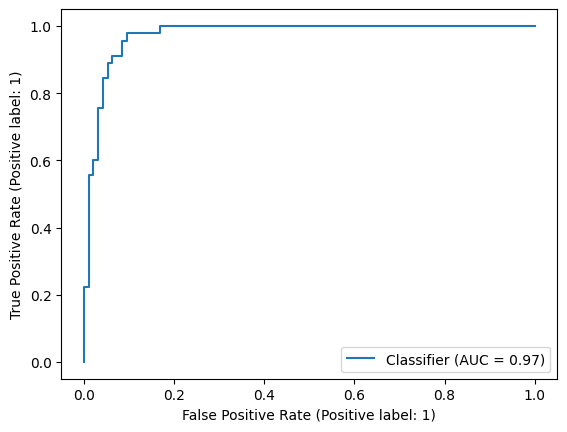

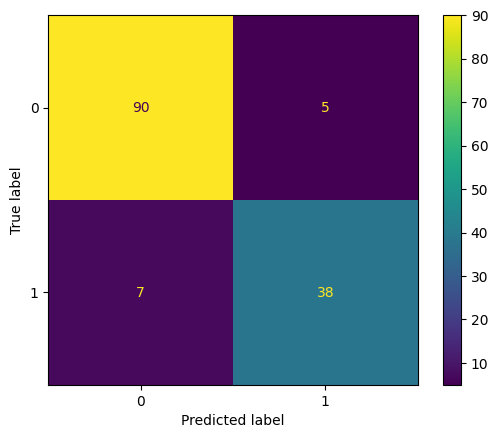

In [ ]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#complete the code to display RocCurve and Confusion Matrix
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Interpret the performance of the model above

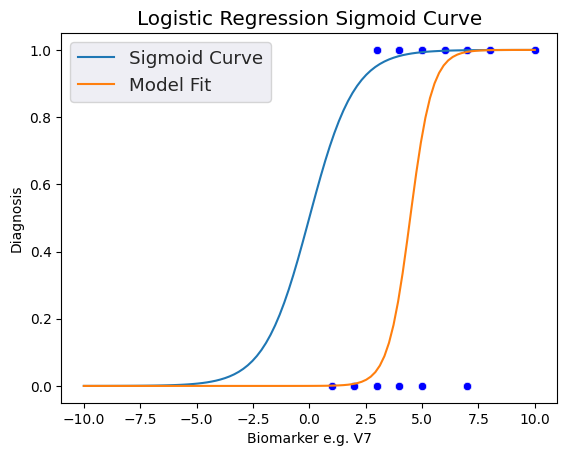

In [ ]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the model coefficients
coef = logreg.coef_.flatten()
intercept = logreg.intercept_
y_vals = sigmoid(np.dot(X_test, coef) + intercept)

# Plot the sigmoid curve using seaborn, for V7
sns.lineplot(x=x_vals, y=sigmoid(x_vals), label='Sigmoid Curve')
sns.lineplot(x=x_vals, y=sigmoid(np.dot(np.column_stack(([x_vals]*5)), coef) + intercept), label='Model Fit')
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)
sns.scatterplot(x=X_test['V7'], y=y_test, color='blue')
plt.xlabel('Biomarker e.g. V7')
plt.ylabel('Diagnosis')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()

Axes(0.125,0.11;0.775x0.77)


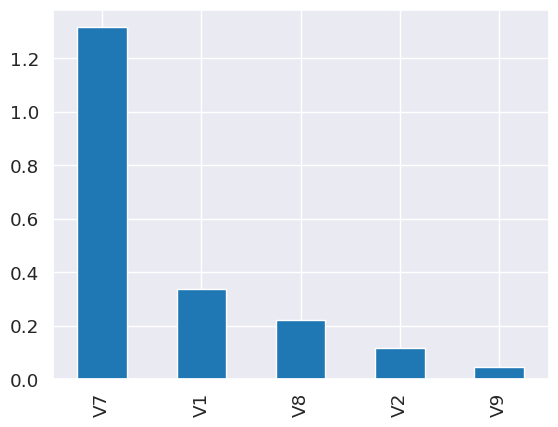

In [ ]:
#Visualise the coefficients
coefs = pd.Series(logreg.coef_[0], index=X.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))

In [ ]:
#Print the model formula
print('Diagnosis= ', '%.3f' % intercept, '+', '%.3f' %coef[0], '*V1', '+', '%.3f' %coef[1], '*V2', '+', '%.3f' %coef[2], '*V7', '+', '%.3f' %coef[3], '*V8', '+', '%.3f' %coef[4], '*V9')

Diagnosis=  -9.123 + 0.340 *V1 + 0.116 *V2 + 1.316 *V7 + 0.221 *V8 + 0.045 *V9


## **Congratulations!**

Now do it yourself for other datasets:

1.  Habermans survival dataset: https://www.kaggle.com/datasets/gilsousa/ or an adapted dataset: https://raw.githubusercontent.com/VanLan0/MIS710/main/haberman_ln.csv or
2.  Tinanic dataset from Lab 1
3.  and/or another dataset of your choice

Challenge: Read hyperparameters https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html and tweak solver, penalty, C ...





# **Task 2: Telco Churn Prediction**!

**Do it yourself:** Repeat the above steps with the telco churn dataset to consilidate your learning


## **2.1 Import Libraries**

In [11]:
# Load necessary libraries here
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import precision_recall_curve, precision_recall_curve, confusion_matrix

## **2.2 Load the Dataset**

In [5]:
# Load data using pandas.read_csv(filepath_or_url, sep=',')
url = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/Week%204/WA_Fn-UseC_-Telco-Customer-Churn.csv'



In [6]:
#Write your code to read the cvs file into df. Hint: pd.read_csv(url)



## **2.3 Practise EDA**

* How many rows and columns in the dataset?
* Return the first n rows.
* What are the columns and their datatypes?
* Is there any missing values?
* Any strong correlation from the dataset?  
* How to deal with categorical features?



In [7]:
# Checking the data types of all the columns
df. info()

# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Inspect and handle missing data**

In [8]:
# Check missing values


# Handle missing values




In [9]:
# Remove customer IDs from the data set
df = df.drop(['customerID'], axis = 1)

In [12]:
# Convert the predictor variable to binary numeric variables
# Convert categorical variables into dummy variables
# Get Correlation of "Churn" with other variables
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))


Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


### **Data Exploration**
* Demographics (age, gender, partner and dependent status)
* Customer account information (Tenures, contracts)
* Distribution of services
* Relation between variables
* Distribution of predictor variable (`Churn`)

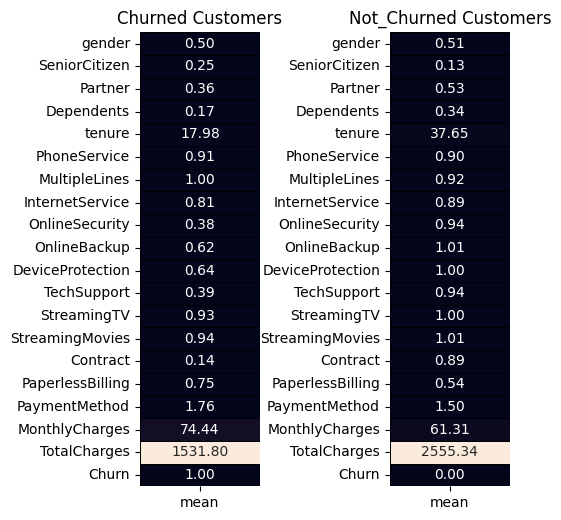

In [13]:
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f', xticklabels=True, yticklabels=True)
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f', xticklabels=True, yticklabels=True)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

Run and Discuss the outcome of the following EDA

In [ ]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot(x='Churn',data = df,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])

plt.title('Number of Churn - Not-Churn Customers');
plt.show()

In [ ]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information

fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i],data = df,hue = "Churn",edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


## **2.4 Data Preparation**


1.   Prepare X, y
2.   Prepare X_train, X_test, y_train, y_test (hint: using `train_test_split')



In [16]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [18]:
X = df1.drop(columns = ['Churn'])
y = df1.Churn.values



In [19]:
#Write your code to split data. Hint: X_train, X_test, y_train, y_test = .....



## **2.5 Model Implementation**

1. Try with the original data. What's the performance?
2. Let's add data normalisation. Has the performance been improved?

In [20]:
lr_model = LogisticRegression().fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

## **2.6 Performance Evaluation**
* Classification report
* Confusion matrix
* Importance weight
* ROC and AUC

In [ ]:
#write your code to print the classification report. Hint: classification_report(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.53      0.57       366

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Run and intepret the outcome of the following code

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

In [ ]:
# To get the weights of all the variables
weights = pd.Series(lr_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))